In [2]:
# Importing libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import sqlite3

In [3]:
# SQLite connection.
conn=sqlite3.connect('../datasets/im.db')
query='''
SELECT *
    FROM sqlite_master;
'''
pd.read_sql(query,conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [4]:
query2='''
SELECT *
    FROM movie_basics
    JOIN movie_ratings
    USING(movie_id);
'''
movie_basics_and_ratings=pd.read_sql(query2,conn)
movie_basics_and_ratings.dropna(inplace=True)
movie_basics_and_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65720 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   primary_title    65720 non-null  object 
 2   original_title   65720 non-null  object 
 3   start_year       65720 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           65720 non-null  object 
 6   averagerating    65720 non-null  float64
 7   numvotes         65720 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [8]:
# Loading the movie budgets data.
movie_budgets=pd.read_csv('../datasets/tn.movie_budgets.csv', index_col=0)
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [9]:
movie_budgets.worldwide_gross = movie_budgets.worldwide_gross.str.replace('[\$,]', '', regex=True)
movie_budgets.production_budget = movie_budgets.production_budget.str.replace('[\$,]', '', regex=True)
movie_budgets.domestic_gross = movie_budgets.domestic_gross.str.replace('[\$,]', '', regex=True)
movie_budgets.production_budget = movie_budgets.production_budget.astype('int64')
movie_budgets.domestic_gross = movie_budgets.domestic_gross.astype('int64')
movie_budgets.worldwide_gross = movie_budgets.worldwide_gross.astype('int64')
movie_budgets.release_date = pd.to_datetime(movie_budgets.release_date)
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5782 non-null   datetime64[ns]
 1   movie              5782 non-null   object        
 2   production_budget  5782 non-null   int64         
 3   domestic_gross     5782 non-null   int64         
 4   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 271.0+ KB


In [10]:
from pandasql import sqldf
pysqldf=lambda q: sqldf(q,globals())
query4='''
SELECT *
    FROM movie_basics_and_ratings AS mbr
    JOIN movie_budgets
    ON mbr.primary_title=movie_budgets.movie;
'''
movie_details_and_revenue=pysqldf(query4)
movie_details_and_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2752 entries, 0 to 2751
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           2752 non-null   object 
 1   primary_title      2752 non-null   object 
 2   original_title     2752 non-null   object 
 3   start_year         2752 non-null   int64  
 4   runtime_minutes    2752 non-null   float64
 5   genres             2752 non-null   object 
 6   averagerating      2752 non-null   float64
 7   numvotes           2752 non-null   int64  
 8   id                 2752 non-null   int64  
 9   release_date       2752 non-null   object 
 10  movie              2752 non-null   object 
 11  production_budget  2752 non-null   int64  
 12  domestic_gross     2752 non-null   int64  
 13  worldwide_gross    2752 non-null   int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 301.1+ KB


In [11]:
# Top 10 genres ordered by domestic and worldwide gross.
top_10_genres=movie_details_and_revenue.groupby('genres')[['production_budget','domestic_gross','worldwide_gross']].mean().sort_values(by=['domestic_gross','worldwide_gross'],ascending=False).head(10)
top_10_genres

,production_budget,domestic_gross,worldwide_gross
genres,,,
"Family,Fantasy,Musical",9.000000e+07,4.400357e+08,9.338154e+08
"Adventure,Drama,Sport",1.500000e+08,4.007380e+08,1.272470e+09
"Fantasy,Romance",1.500000e+08,4.007380e+08,1.272470e+09
"Action,Adventure,Sci-Fi",1.606103e+08,2.203234e+08,5.991302e+08
"Adventure,Fantasy",2.316667e+08,1.928914e+08,7.012107e+08
"Comedy,Romance,Sci-Fi",6.500000e+07,1.828051e+08,3.741051e+08
"Biography,Documentary,History",9.025000e+07,1.810211e+08,4.299082e+08
"Biography,Drama,Musical",8.400000e+07,1.743402e+08,3.866656e+08
"Adventure,Drama,Western",3.500000e+07,1.712430e+08,2.522769e+08


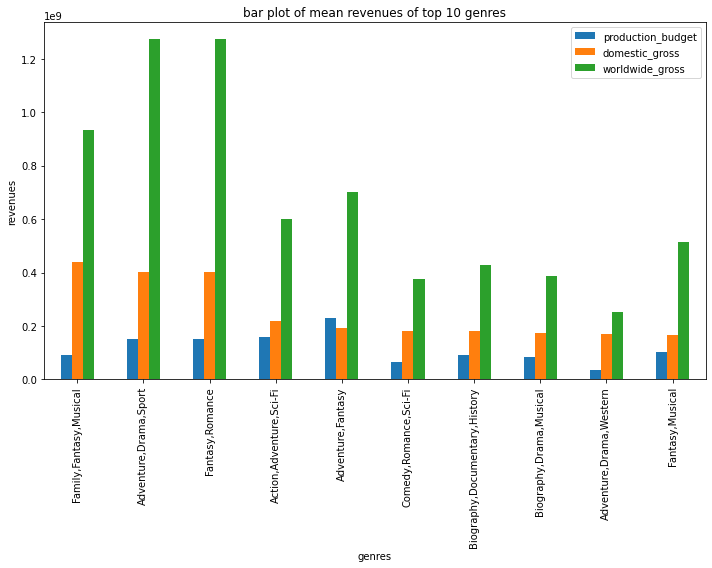

In [12]:
# Plot for the top 10 genres.
top_10_genres.plot(kind='bar',figsize=(10,8))
plt.title('bar plot of mean revenues of top 10 genres')
plt.ylabel('revenues')
plt.tight_layout();

A mix of adventure, Drama, Sport and also a mix of Fantasy, Romance seem to yield high profit domestically and internationally.